<a href="https://colab.research.google.com/github/camilo520/ProcesamientoImagen/blob/master/Clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [38]:
#importar librerias

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/ProcesamientoImagen/'
os.chdir(path)
!pwd
%matplotlib inline

/content/drive/My Drive/ProcesamientoImagen


In [0]:
def displayGray3(a, b, c, title1="Original", title2="Edited", title3="Edited"):
    plt.figure(figsize=(3,3))
    plt.subplot(131),plt.imshow(a, cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(c, cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    
def displayGray2(a, b, c, title1="Original", title2="Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(a, cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    
def displayColor3(a, b, c, title1="Original", title2="Edited", title3="Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(131),plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()    
    
    
def displayColor2(a, b, title1="Original", title2="Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()        
    
def readRGB(imgPath):
    img=cv2.imread(imgPath)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

# Implementacion Nearest **Neighbour**

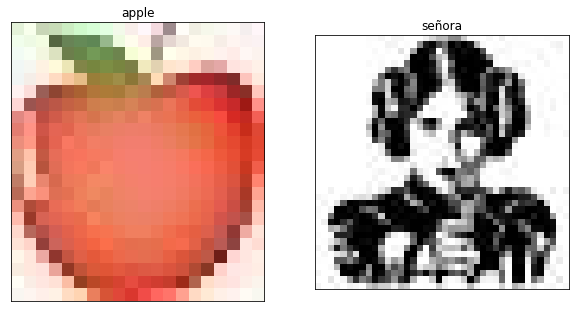

In [18]:
imgA=readRGB('apple20x22.jpg')
imgM=readRGB('ico.jpg')
near_imgA=cv2.resize(imgA, None, fx=5, fy=5, interpolation=cv2.INTER_NEAREST)
near_imgM=cv2.resize(imgM, None, fx=5, fy=5, interpolation=cv2.INTER_NEAREST)
displayColor2(near_imgA, near_imgM,'apple','señora')

# Interpolacion **Lineal**

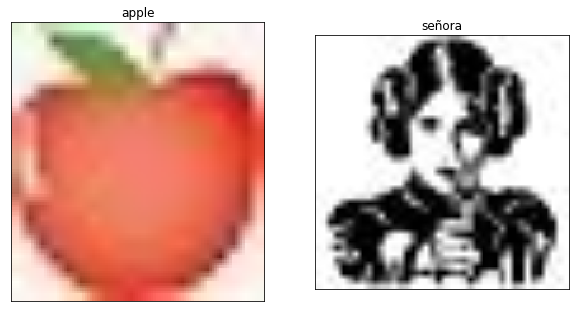

In [19]:
imgA=readRGB('apple20x22.jpg')
imgM=readRGB('ico.jpg')
near_imgA=cv2.resize(imgA, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
near_imgM=cv2.resize(imgM, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
displayColor2(near_imgA, near_imgM,'apple','señora')

# Interpolacion **Bicubica**

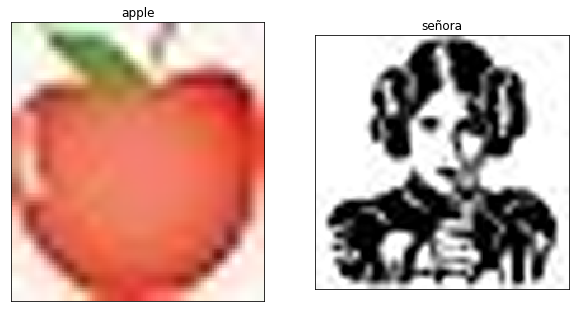

In [20]:
imgA=readRGB('apple20x22.jpg')
imgM=readRGB('ico.jpg')
near_imgA=cv2.resize(imgA, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)
near_imgM=cv2.resize(imgM, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)
displayColor2(near_imgA, near_imgM,'apple','señora')

# Otros **algoritmos**

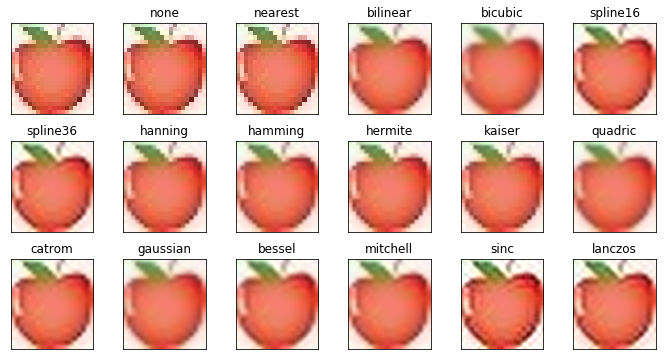

In [24]:
methods=[None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
        'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
        'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

grid=imgA

fig, axes=plt.subplots(3,6,figsize=(12,6), subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(grid, interpolation=interp_method)
    ax.set_title(interp_method)
    
    
plt.show()

# Negativo de una **imagen** a color

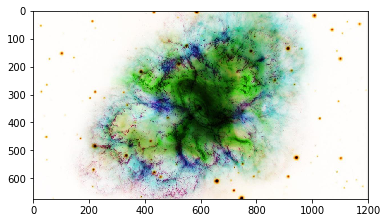

In [32]:
from PIL import Image
foto=Image.open('ciencia-del-universo-1530540262286.jpg')
datos=list(foto.getdata())
datos_invertidos=[(255 - datos[x][0], 255 - datos[x][1], 255 - datos[x][2]) for x in range(len(datos))]
imagen_invertida=Image.new('RGB', foto.size)
imagen_invertida.putdata(datos_invertidos)
plt.imshow(np.asarray(imagen_invertida))

# Negativo de una imagen en **gris**

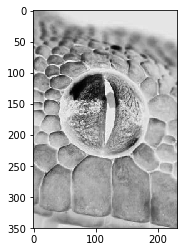

In [34]:
from PIL import Image
foto=Image.open('ojo.jpg')
datos=list(foto.getdata())
datos_invertidos=[255 - x for x in datos]
imagen_invertida=Image.new('L', foto.size)
imagen_invertida.putdata(datos_invertidos)
plt.imshow(np.asarray(imagen_invertida), cmap='gray')

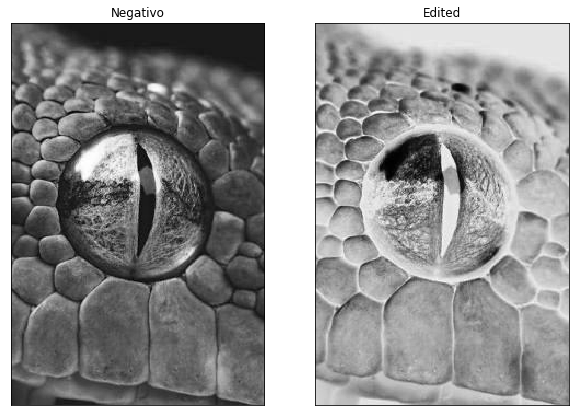

In [55]:
def negative(l):
    img=cv2.imread("ojo.jpg", cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2=np.zeros((rows, columns), dtype=np.uint8)
    for x in range(rows):
        for y in range(columns):
            img2[x,y]=(l-1)-img[x,y]
    displayGray2(img,img2,'original','Negativo')
    return
  
negative(256)  

# Funcion **logaritmica**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


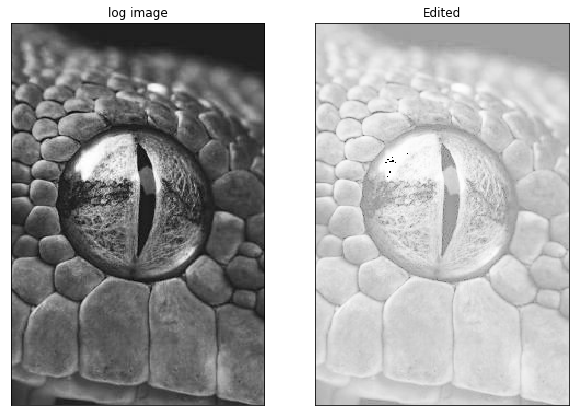

In [56]:
import cv2
import numpy as np
img=cv2.imread('ojo.jpg')
img_log=(np.log(img+1)/(np.log(1+np.max(img))))*255
img_log=np.array(img_log, dtype=np.uint8)
displayGray2(img,img_log, 'original','log image')